In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib.pyplot import figure
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DOGE_weekly = pd.read_csv('/content/drive/Shareddrives/Crypto SP500 /data for arima/DOGE-USD-weekly.csv')

DOGE_weekly['Date'] = pd.to_datetime(DOGE_weekly['Date'], infer_datetime_format=True)
DOGE_weekly

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-15,0.000293,0.000325,0.000260,0.000288,0.000288,6095217
1,2014-09-22,0.000288,0.000467,0.000285,0.000392,0.000392,14776269
2,2014-09-29,0.000394,0.000408,0.000260,0.000273,0.000273,7274479
3,2014-10-06,0.000272,0.000313,0.000262,0.000290,0.000290,4901894
4,2014-10-13,0.000291,0.000293,0.000241,0.000244,0.000244,3096474
...,...,...,...,...,...,...,...
373,2021-11-08,0.266728,0.296532,0.238030,0.262912,0.262912,14647538681
374,2021-11-15,0.262870,0.265170,0.216099,0.226328,0.226328,9534560222
375,2021-11-22,0.226160,0.236201,0.190344,0.207472,0.207472,10308599127
376,2021-11-29,0.207444,0.226890,0.132826,0.171255,0.171255,13929503812


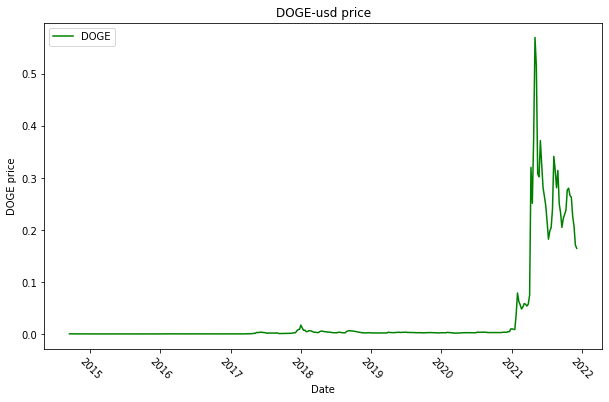

In [ ]:
line = plt.plot(DOGE_weekly['Date'],DOGE_weekly['Close'], 'green',label = 'DOGE')
plt.title('DOGE-usd price')
plt.legend()
plt.xticks(rotation = -45)
plt.xlabel("Date")
plt.ylabel("DOGE price")
plt.show()

https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima

reference 

In [ ]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6


In [ ]:
DOGE_weekly.drop(columns=(['Open','High','Low','Adj Close','Volume']),axis=1,inplace=True)
indexedDOGE_weekly=DOGE_weekly.set_index(['Date'])
indexedDOGE_weekly

,Close
Date,
2014-09-15,0.000288
2014-09-22,0.000392
2014-09-29,0.000273
2014-10-06,0.000290
2014-10-13,0.000244
...,...
2021-11-08,0.262912
2021-11-15,0.226328
2021-11-22,0.207472


In [ ]:
#From the plot below, we can see that there is a Trend compoenent in th series. 
#Hence, we now check for stationarity of the data
#Determine rolling statistics
rolmean = indexedDOGE_weekly.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedDOGE_weekly.rolling(window=12).std()
print(rolmean,rolstd)

               Close
Date                
2014-09-15       NaN
2014-09-22       NaN
2014-09-29       NaN
2014-10-06       NaN
2014-10-13       NaN
...              ...
2021-11-08  0.255029
2021-11-15  0.250462
2021-11-22  0.241541
2021-11-29  0.234927
2021-12-06  0.229225

[378 rows x 1 columns]                Close
Date                
2014-09-15       NaN
2014-09-22       NaN
2014-09-29       NaN
2014-10-06       NaN
2014-10-13       NaN
...              ...
2021-11-08  0.031004
2021-11-15  0.030846
2021-11-22  0.025682
2021-11-29  0.032457
2021-12-06  0.038286

[378 rows x 1 columns]


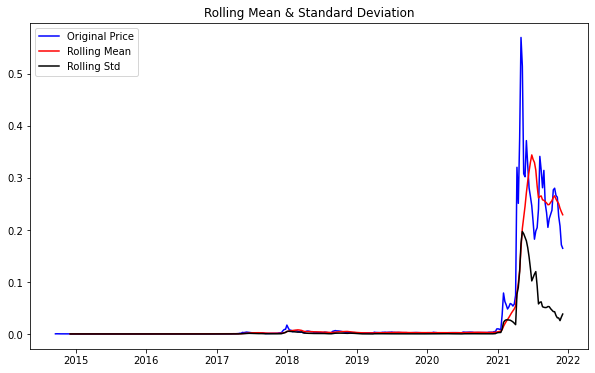

In [ ]:
#Plot rolling statistics
orig = plt.plot(indexedDOGE_weekly, color='blue', label='Original Price')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best') #upper left location
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDOGE_weekly['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -1.535382
p-value                          0.515942
#Lags Used                      14.000000
Number of Observations Used    363.000000
Critical Value (1%)             -3.448494
Critical Value (5%)             -2.869535
Critical Value (10%)            -2.571029
dtype: float64


In [ ]:
#P-value=0.515942 is extremely high. The time series is not stationary.

#Log Scale Transformation

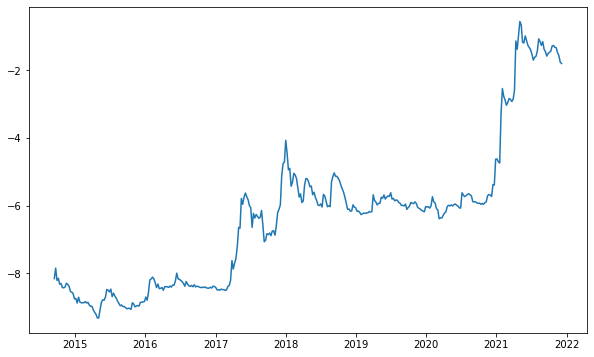

In [ ]:
#Estimating trend
indexedDOGE_weekly_logScale = np.log(indexedDOGE_weekly)
plt.plot(indexedDOGE_weekly_logScale)

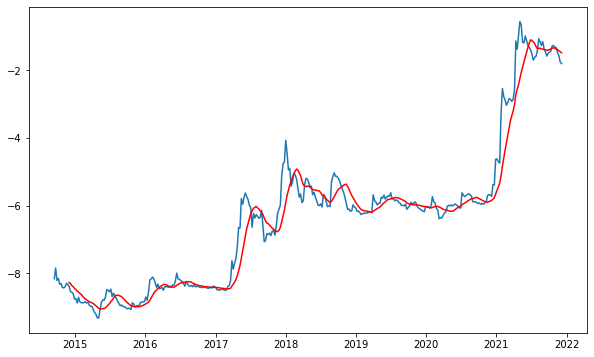

In [ ]:
#The below transformation is required to make series stationary
movingAverage = indexedDOGE_weekly_logScale.rolling(window=12).mean()
movingSTD = indexedDOGE_weekly_logScale.rolling(window=12).std()
plt.plot(indexedDOGE_weekly_logScale)
plt.plot(movingAverage, color='red')


In [ ]:
datasetLogScaleMinusMovingAverage = indexedDOGE_weekly_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)


,Close
Date,
2014-12-01,-0.114582
2014-12-08,-0.238118
2014-12-15,-0.194495
2014-12-22,-0.209372
2014-12-29,-0.311105
2015-01-05,-0.263360
2015-01-12,-0.348908
2015-01-19,-0.154714
2015-01-26,-0.261951


In [ ]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    



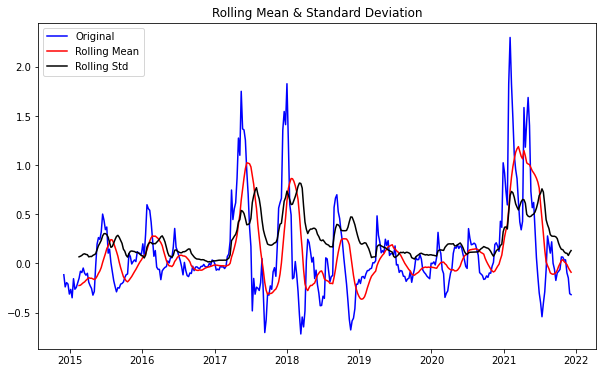

Results of Dickey Fuller Test:
Test Statistic                  -5.539117
p-value                          0.000002
#Lags Used                       3.000000
Number of Observations Used    363.000000
Critical Value (1%)             -3.448494
Critical Value (5%)             -2.869535
Critical Value (10%)            -2.571029
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

In [ ]:
#Now P-value is much lower but still not enough to reject the hypothesis that our time series is not stationary,
#and the Critical values are closing to Test Statistic now.
#Looks good.

#Exponential Decay Transformation 

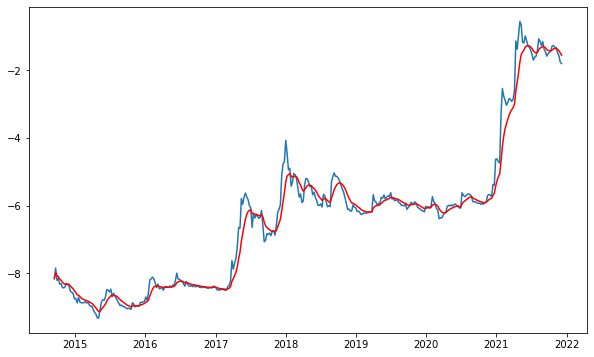

In [ ]:
exponentialDecayWeightedAverage = indexedDOGE_weekly_logScale.ewm(halflife=3, min_periods=0, adjust=True).mean()
plt.plot(indexedDOGE_weekly_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')


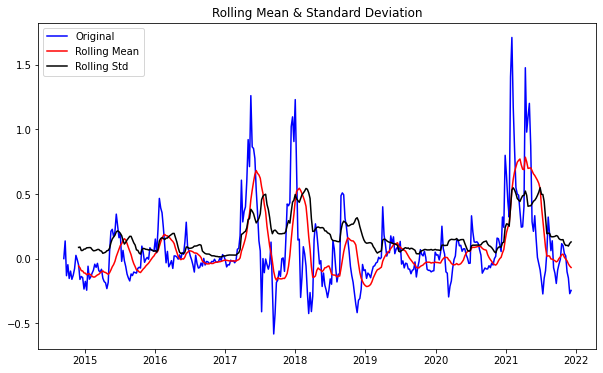

Results of Dickey Fuller Test:
Test Statistic                  -5.538263
p-value                          0.000002
#Lags Used                       0.000000
Number of Observations Used    377.000000
Critical Value (1%)             -3.447815
Critical Value (5%)             -2.869237
Critical Value (10%)            -2.570870
dtype: float64


In [ ]:
datasetLogScaleMinusExponentialMovingAverage = indexedDOGE_weekly_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

#p-value is not very good and the series for moving avg & std. dev. is not parallel to x-axis

#Time Shift Transformation 

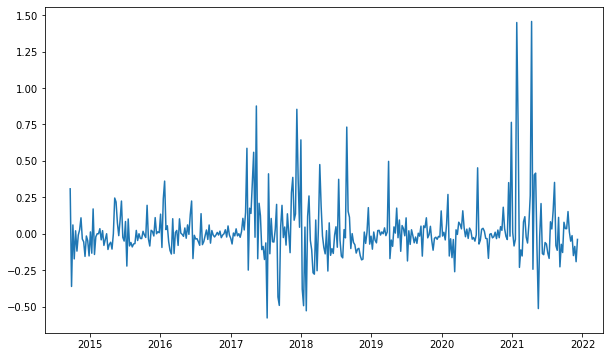

In [ ]:
datasetLogDiffShifting = indexedDOGE_weekly_logScale - indexedDOGE_weekly_logScale.shift()
plt.plot(datasetLogDiffShifting)


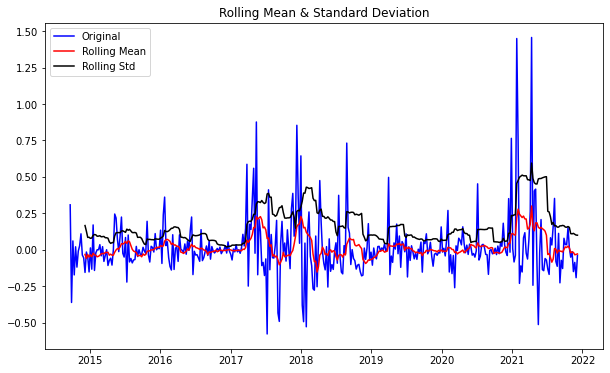

Results of Dickey Fuller Test:
Test Statistic                -1.780936e+01
p-value                        3.193942e-30
#Lags Used                     0.000000e+00
Number of Observations Used    3.760000e+02
Critical Value (1%)           -3.447862e+00
Critical Value (5%)           -2.869258e+00
Critical Value (10%)          -2.570881e+00
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [ ]:
#The rolling mean and rolling std are not parallelled to x-axis, which is not very good.

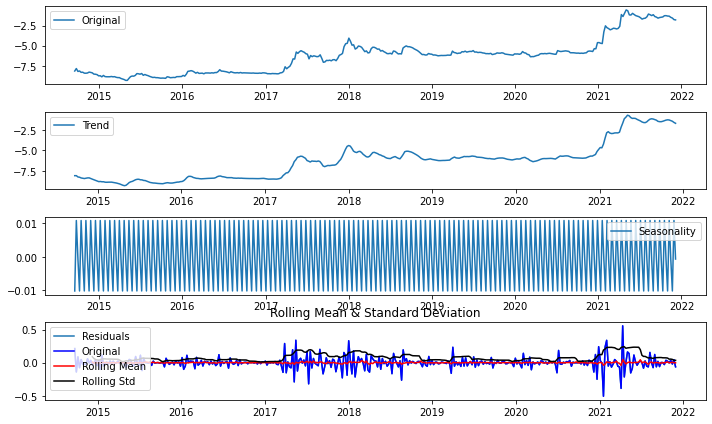

Results of Dickey Fuller Test:
Test Statistic                -7.941579e+00
p-value                        3.303011e-12
#Lags Used                     1.600000e+01
Number of Observations Used    3.590000e+02
Critical Value (1%)           -3.448697e+00
Critical Value (5%)           -2.869625e+00
Critical Value (10%)          -2.571077e+00
dtype: float64


In [ ]:
decomposition = seasonal_decompose(indexedDOGE_weekly_logScale, freq=3) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDOGE_weekly_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [ ]:
#The rolling mean and rolling std are parallelled to x-axis now, which is better than before.

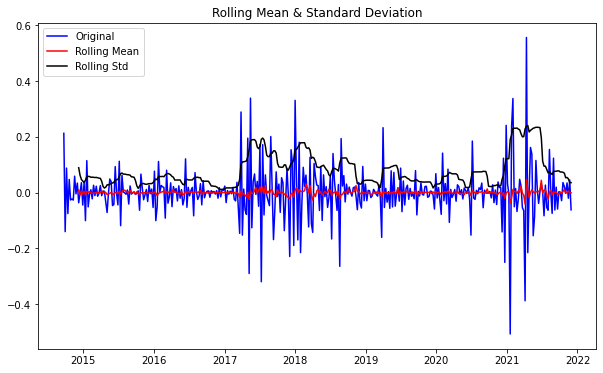

Results of Dickey Fuller Test:
Test Statistic                -7.941579e+00
p-value                        3.303011e-12
#Lags Used                     1.600000e+01
Number of Observations Used    3.590000e+02
Critical Value (1%)           -3.448697e+00
Critical Value (5%)           -2.869625e+00
Critical Value (10%)          -2.571077e+00
dtype: float64


In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)



#Plotting ACF & PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



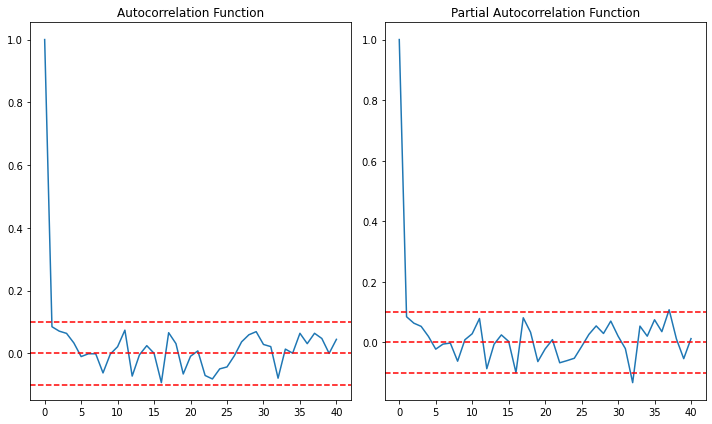

In [ ]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=40)
lag_pacf = pacf(datasetLogDiffShifting, nlags=40, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            



From the ACF graph, we see that curve touches y=0 and it crosses the first line at x=1 or 2 or 3 or 4. Thus, from theory, Q = 1 or 2 or 3 or 4. From the PACF graph, we see that curve touches y=0.0 line and crosses the first line at x=1 or 2 or 3 or 4. Thus, from theory, P = 1 or 2 or 3 or 4.

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models wi:ll give a value of RSS. Lower RSS values indicate a better model.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.



Plotting AR model


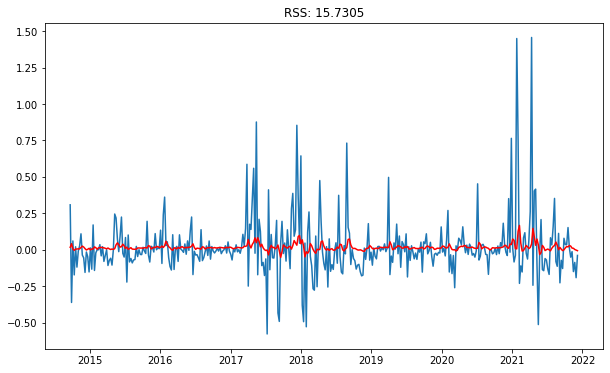

In [ ]:
#AR Model
#making order=() gives RSS=
model = ARIMA(indexedDOGE_weekly_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.



Plotting MA model


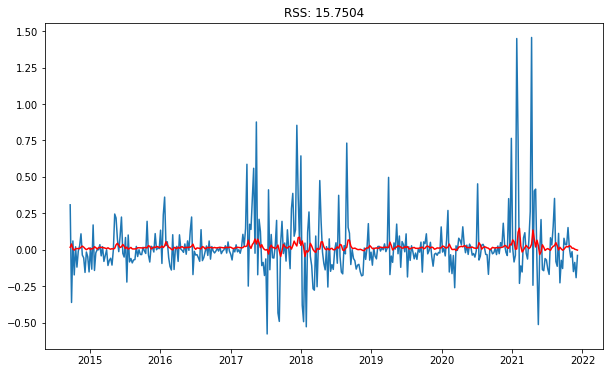

In [ ]:
#MA Model
model = ARIMA(indexedDOGE_weekly_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting MA model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

invalid value encountered in true_divide



Plotting ARIMA model


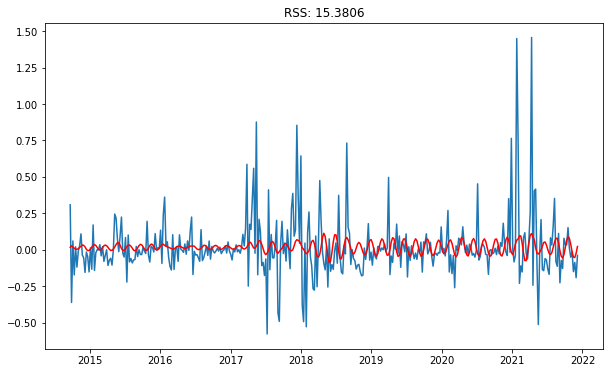

In [ ]:
# AR+I+MA = ARIMA model
model = ARIMA(indexedDOGE_weekly_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting ARIMA model')

In [ ]:
#RSS of ARIMA = 15.38 < rss of ar and ma, ARIMA model performs better on our time series.
#But the rss is still very large.

#Prediction & Reverse transformations

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2014-09-22    0.017256
2014-09-29    0.033271
2014-10-06    0.001641
2014-10-13    0.027884
2014-10-20   -0.016983
dtype: float64


In [ ]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)



Date
2014-09-22    0.017256
2014-09-29    0.050527
2014-10-06    0.052168
2014-10-13    0.080052
2014-10-20    0.063069
                ...   
2021-11-08    6.550977
2021-11-15    6.520975
2021-11-22    6.445456
2021-11-29    6.439710
2021-12-06    6.435204
Length: 377, dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(indexedDOGE_weekly_logScale['Close'].iloc[0], index=indexedDOGE_weekly_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()



Date
2014-09-15   -8.152550
2014-09-22   -8.135294
2014-09-29   -8.102023
2014-10-06   -8.100382
2014-10-13   -8.072498
dtype: float64

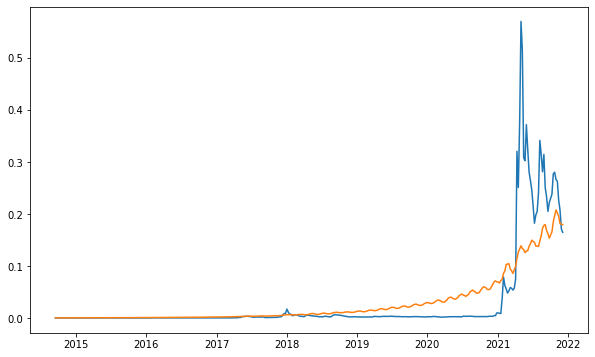

In [ ]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDOGE_weekly)
plt.plot(predictions_ARIMA)


In [ ]:
indexedDOGE_weekly_logScale

,Close
Date,
2014-09-15,-8.152550
2014-09-22,-7.844249
2014-09-29,-8.206039
2014-10-06,-8.145630
2014-10-13,-8.318342
...,...
2021-11-08,-1.335936
2021-11-15,-1.485770
2021-11-22,-1.572759


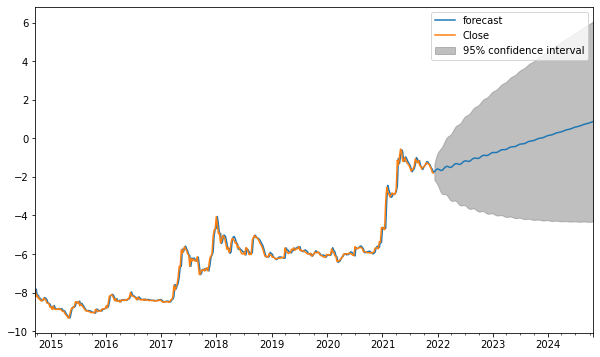

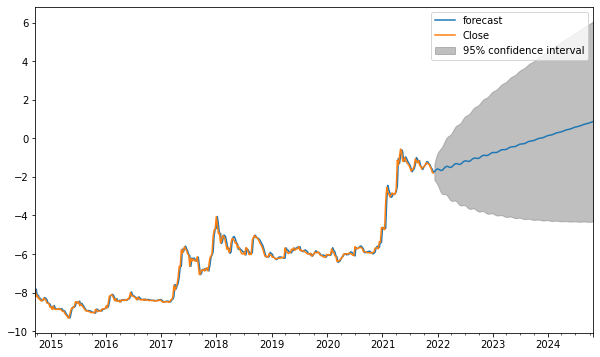

In [ ]:
#We have 378(existing data of 7 yrs in weeks) data points. 
#And we want to forecast for additional 150 data points for 3 yrs.
results_ARIMA.plot_predict(1,528) 


